<a href="https://colab.research.google.com/github/guimazzolino/MVPII/blob/main/MVP2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP II - Guilherme Fernandes Viana Mazzolino

# Parte A

Nesta primeira parte do MVP será utilizada o dataset presente no kaggle, chamado "Wine Quality Data". Este dataset possui um total de 32.485 instâncias de vinho com as quais a qualidade e o tipo dos vinhos podem ser previstos analisando os ingredientes ou os compostos do vinho. Os dados contêm 10 características ou ingredientes do vinho com base nos quais a qualidade ou os tipos de vinho podem ser previstos.

---------


O principal objetivo deste trabalho encontra-se em desenvolver um modelo preditivo capaz de avaliar qual o tipo de vinho, dada a sua qualidade com base em um conjunto de características físico-químicas. O conjunto de dados contém várias observações de vinhos com informações sobre suas propriedades físico-químicas e a qualidade do vinho em uma escala de 0 a 10.

## Analise Exploratória e Pré-processamento

In [2]:
# Neste primeiro momento, faço a importação de todos os pacotes que serão utilizados, bem como o dataset
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

url = 'https://raw.githubusercontent.com/guimazzolino/MVPII/main/WineQuality.csv'
dataset = pd.read_csv(url)
pd.DataFrame(dataset)

dataset.drop(columns = 'Unnamed: 0', inplace=True) # Apenas retirando a coluna de ID
dataset['Type'] = dataset['Type'].replace({'Red Wine':0,'White Wine':1}) # Faço a alteração da variavel de caracteres para uma dummy

print(dataset.shape) # Para ver o número de linhas e de colunas
print(dataset.info()) # para ter mais infos sobre cada coluna

(32485, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 3.2 MB
None


In [ ]:
print(dataset.head()) # Para visualizar as primeiras 5 linhas

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  quality  Type  
0     10.4        6     1  
1     11.7        6     1  
2 

In [ ]:
print(dataset.describe()) # Verificar estatísticas descritivas das colunas numéricas

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   32485.000000      32485.000000  32485.000000    32485.000000   
mean        7.214736          0.340122      0.318324        5.438696   
std         1.308216          0.164912      0.145152        4.799221   
min         3.800000          0.080000      0.000000        0.600000   
25%         6.400000          0.230000      0.250000        1.800000   
50%         7.000000          0.290000      0.310000        3.000000   
75%         7.700000          0.410000      0.390000        8.100000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  32485.000000         32485.000000          32485.000000  32485.000000   
mean       0.056009            30.458258            115.656303      0.994719   
std        0.034503            17.608076             56.456074      0.003015   
min        0.009000            

In [ ]:
# Como há linhas duplicadas, vou excluí-las
dataset = dataset.drop_duplicates()

print(dataset.shape) #Para descobrirmos qual será o tamanho real do dataset que será utilizado

(5288, 13)


In [ ]:
# Por fim, mas não menos importante, faço o teste para saber se há algum valor vazio no meu dataset
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64


## Preparação de Dados

In [3]:
# Assim como realizado nas aulas, farei a separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:12] # atributos
y = array[:,12] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem e Treinamento

LR: 0.984454 (0.002205)
KNN: 0.987456 (0.003116)
CART: 0.999269 (0.000556)
NB: 0.973526 (0.002642)
SVM: 0.941589 (0.004702)
Bagging: 0.999538 (0.000415)
RF: 0.999615 (0.000422)
ET: 0.999615 (0.000422)
Ada: 0.998345 (0.000572)
GB: 0.998461 (0.000789)
Voting: 0.990188 (0.002178)


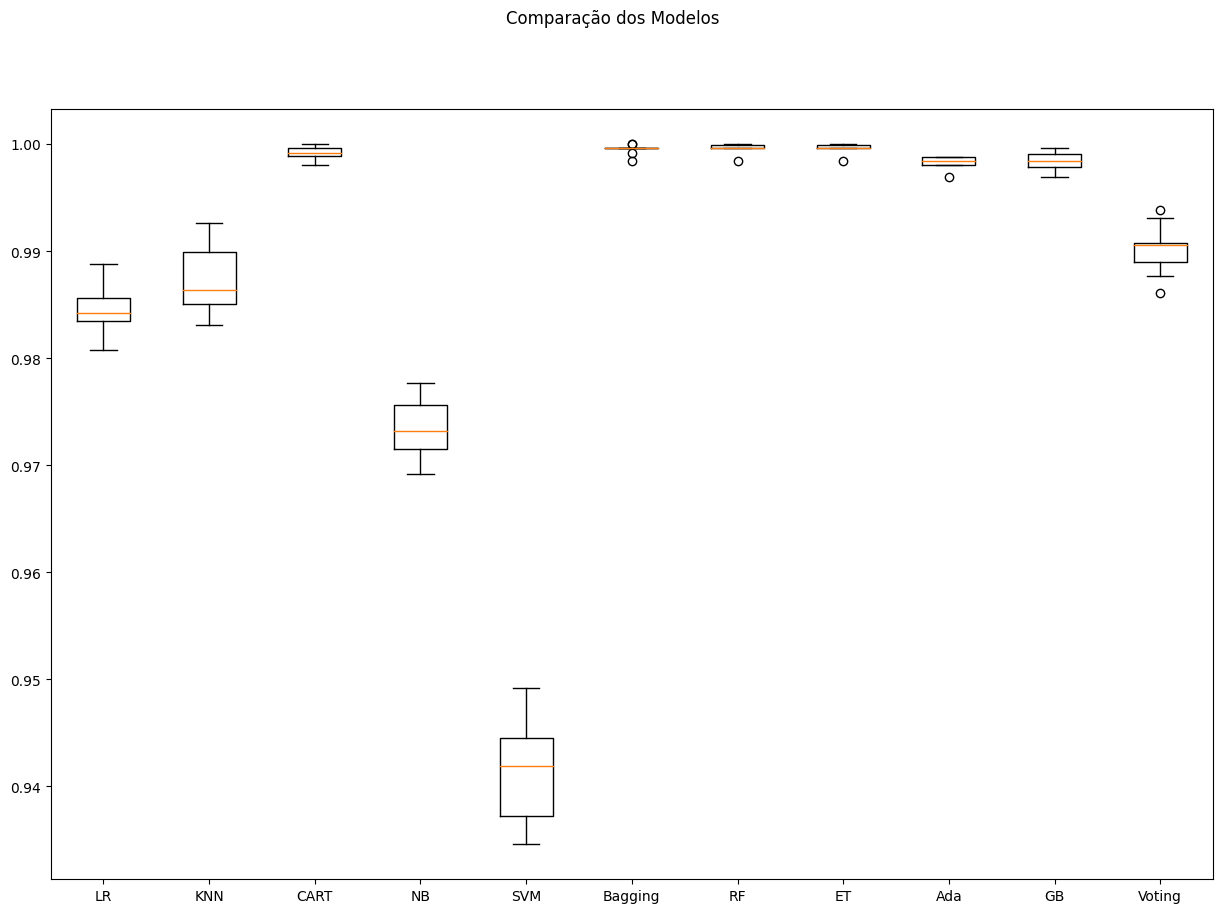

In [3]:
# Agora, cria-se e avalia-se os modelos (linha base):


np.random.seed(7) # Semente utilizada ao longo das aulas

# Criação das listas
models = [] # Lista que conterá os modelos
bases = []
results = []
names = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Após rodar os modelos e testá-los, pode-se afirmar que o melhor foi o de Extra Trees, o qual obteve uma acurácia de 0.994799.



LR-orig: 0.979 (0.005)
KNN-orig: 0.937 (0.009)
CART-orig: 0.979 (0.006)
NB-orig: 0.969 (0.007)
SVM-orig: 0.934 (0.010)
Bag-orig: 0.989 (0.003)
RF-orig: 0.994 (0.004)
ET-orig: 0.995 (0.004)
Ada-orig: 0.993 (0.005)
GB-orig: 0.992 (0.004)
Vot-orig: 0.979 (0.007)
LR-padr: 0.994 (0.005)
KNN-padr: 0.992 (0.004)
CART-padr: 0.981 (0.006)
NB-padr: 0.973 (0.007)
SVM-padr: 0.996 (0.004)
Bag-padr: 0.989 (0.004)
RF-padr: 0.993 (0.005)
ET-padr: 0.994 (0.004)
Ada-padr: 0.993 (0.005)
GB-padr: 0.992 (0.004)
Vot-padr: 0.996 (0.004)
LR-norm: 0.989 (0.005)
KNN-norm: 0.992 (0.005)
CART-norm: 0.980 (0.008)
NB-norm: 0.973 (0.007)
SVM-norm: 0.996 (0.004)
Bag-norm: 0.989 (0.004)
RF-norm: 0.993 (0.004)
ET-norm: 0.995 (0.004)
Ada-norm: 0.993 (0.005)
GB-norm: 0.992 (0.004)
Vot-norm: 0.994 (0.004)


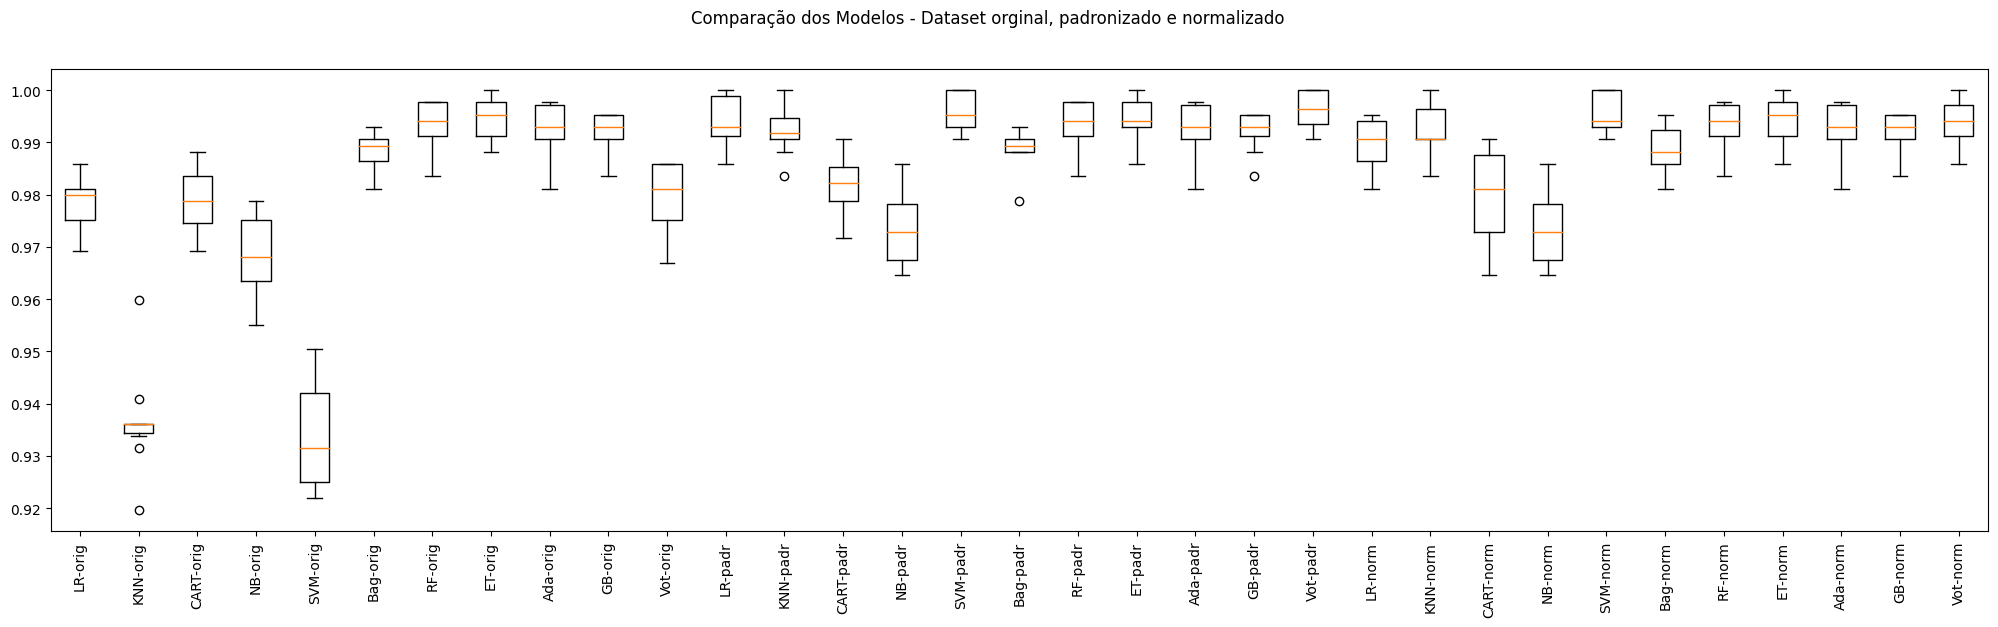

In [ ]:
# Agora, farei a padronização e a normalização, respectivamente:

np.random.seed(7) # Semente utilizada ao longo das aulas

# Listas que serão utilizadas:
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados:
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas:
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Execução dos Pipelines:
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Para a Otimização de Hiperparâmetros, temos:

# Tuning do KNN

np.random.seed(7) # Semente utilizada ao longo das aulas

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.954137 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.994563 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-norm - Melhor: 0.994563 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
